In [52]:
#Import libraries and their associated methods
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline

# Load the digits dataset
digits = load_digits()

In [53]:
#determnine the total number of images and labels
print("Image Data Shape",digits.data.shape)
print("Label Data Shape",digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


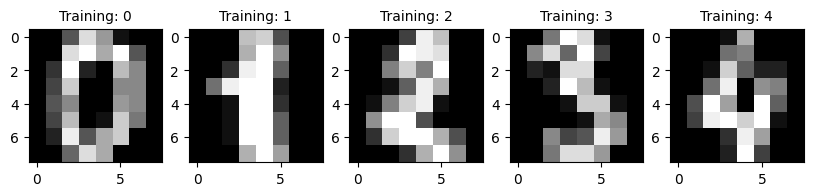

In [54]:
# Displaying some images and labels
plt.figure(figsize=(10, 7))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title(f'Training: {label}', fontsize=10)

plt.show()

In [55]:
#diviing dataset into Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [56]:
print(X_train.shape)

(1383, 64)


In [57]:
print(y_train.shape)

(1383,)


In [58]:
print(X_test.shape)

(414, 64)


In [59]:
print(X_train.shape)

(1383, 64)


In [60]:
#import the logistic model
from sklearn.linear_model import LogisticRegression
#making an instance of the model and training it
LogisticRegress = LogisticRegression()
LogisticRegress.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
#predicting the output of the first element of the test set
print(LogisticRegress.predict(X_test[0].reshape(1,-1)))

[4]


In [62]:
#predicting the output of the 10 elements of the test set
print(LogisticRegress.predict(X_test[0:10]))

[4 0 9 1 8 7 1 5 1 6]


In [63]:
#predicting for the entire dataset
y_pred=LogisticRegress.predict(X_test)

In [64]:
#determine the accuracy of the model
score=LogisticRegress.score(X_test,y_test)
print(score)

0.9516908212560387


In [65]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy Score:0.9516908212560387')

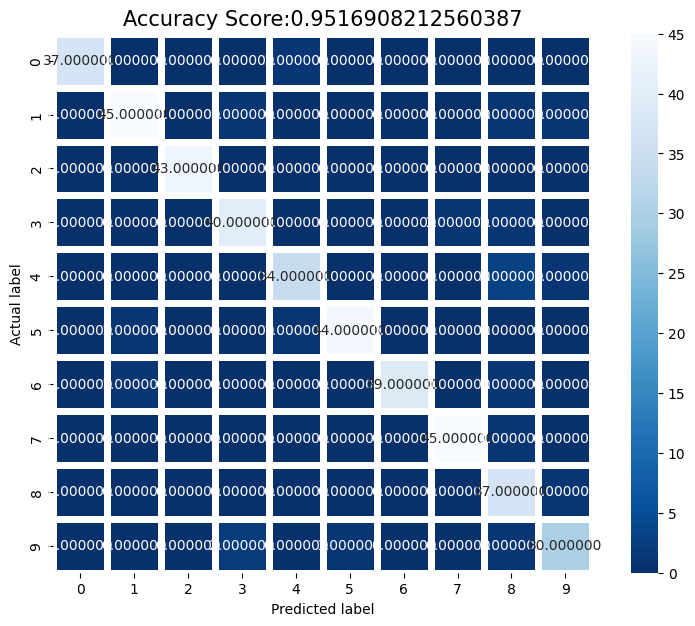

In [66]:
#representing the confusion matrix in a heat map
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="3f", linewidths=5, square=True, cmap="Blues_r")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score:{0}'.format(score)
plt.title(all_sample_title, size=15)

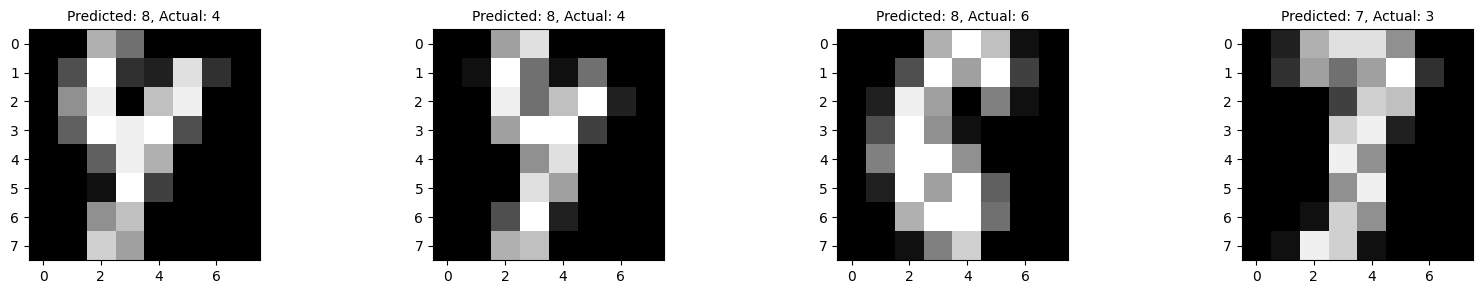

In [67]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(y_pred, y_test):
    if predict != actual:
        misclassifiedIndex.append(index)
    index += 1

plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(X_test[wrong], (8, 8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(y_pred[wrong], y_test[wrong]), fontsize=10)
